In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [3]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)



pics:  (400, 64, 64)
labels:  (400,)


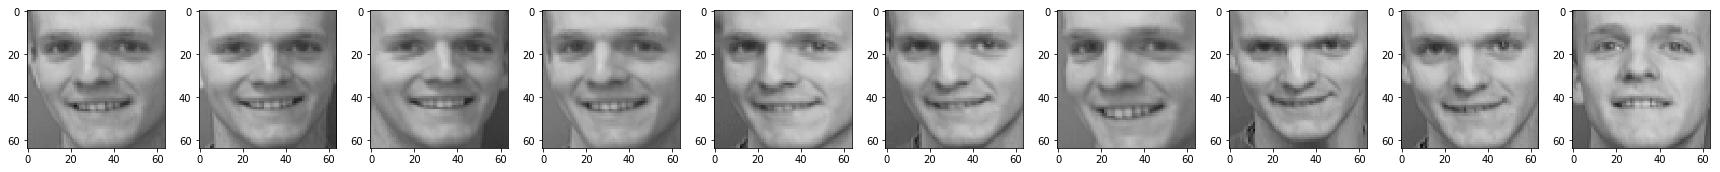

In [4]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+40] # 4th subject
    imshow(x)
plt.show()

    


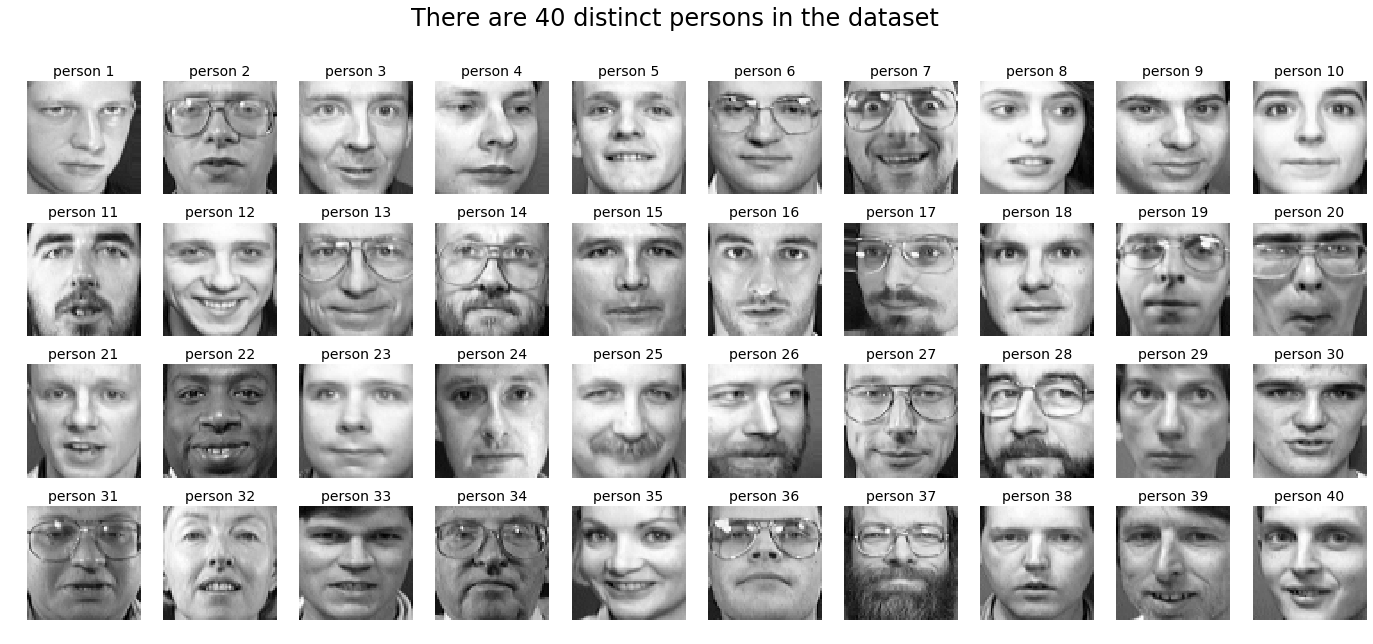

In [5]:
# All unique faces in the sample
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[(10*i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [6]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

Y = labels.reshape(-1,1) # store labels in Y
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400, 1)


The data set contains 10 face images for each subject. Of the face images, 80 percent will be used for training, 20 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 8 training images and 2 test images for each subject. You can play with training and test rates.

In [7]:
#Split data for train and test purposes

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (280, 4096)
x_test:  (120, 4096)
y_train:  (280, 1)
y_test:  (120, 1)


In [8]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [9]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [10]:

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)
y_pred = lr.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)





/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR_accuracy is % 97.5
confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


In [11]:


rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 2]]
RF_accuracy is % 93.33


In [12]:


Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)


y_pred = Knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Knn_accuracy is % 90.0
confusion matrix:
[[1 0 0 ... 1 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]


In [13]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)
svm_accuracy = round(svm.score(x_test,y_test)*100,2)



y_pred = svm.predict(x_test)


# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("SVM_accuracy is %",svm_accuracy)
list_names.append("SVM")
list_accuracy.append(svm_accuracy)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 2]]
SVM_accuracy is % 96.67


In [14]:

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy = round(nb.score(x_test,y_test)*100,2)



# Predicting the Test set results
y_pred = nb.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("Naive_Bayes_accuracy is %",nb_accuracy)
list_names.append("Naive_Bayes")
list_accuracy.append(nb_accuracy)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]
Naive_Bayes_accuracy is % 73.33


In [15]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Naive_Bayes,73.33
1,KNN,90.00
2,Random Forest,93.33
3,SVM,96.67
4,Logistic Regression,97.50


In [16]:
#from sklearn.decomposition import PCA

pca = PCA(100)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)


print('Original dataset:',x_train.shape)
print('Dataset after applying PCA:',X_train_pca.shape)
print('No of PCs/Eigen Faces:',len(pca.components_))
print('Eigen Face Dimension:',pca.components_.shape)
print('Variance Captured:',np.sum(pca.explained_variance_ratio_))


Original dataset: (280, 4096)
Dataset after applying PCA: (280, 100)
No of PCs/Eigen Faces: 100
Eigen Face Dimension: (100, 4096)
Variance Captured: 0.94777656


Text(0.5, 1.0, 'Average Face')

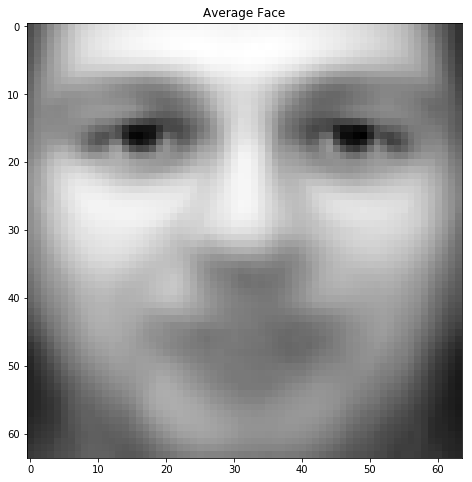

In [17]:
# Average face of the samples

plt.subplots(1,1,figsize=(8,8))
plt.imshow(pca.mean_.reshape((64,64)), cmap="gray")
plt.title('Average Face')


Text(0.5, 0.98, 'All Eigen Faces')

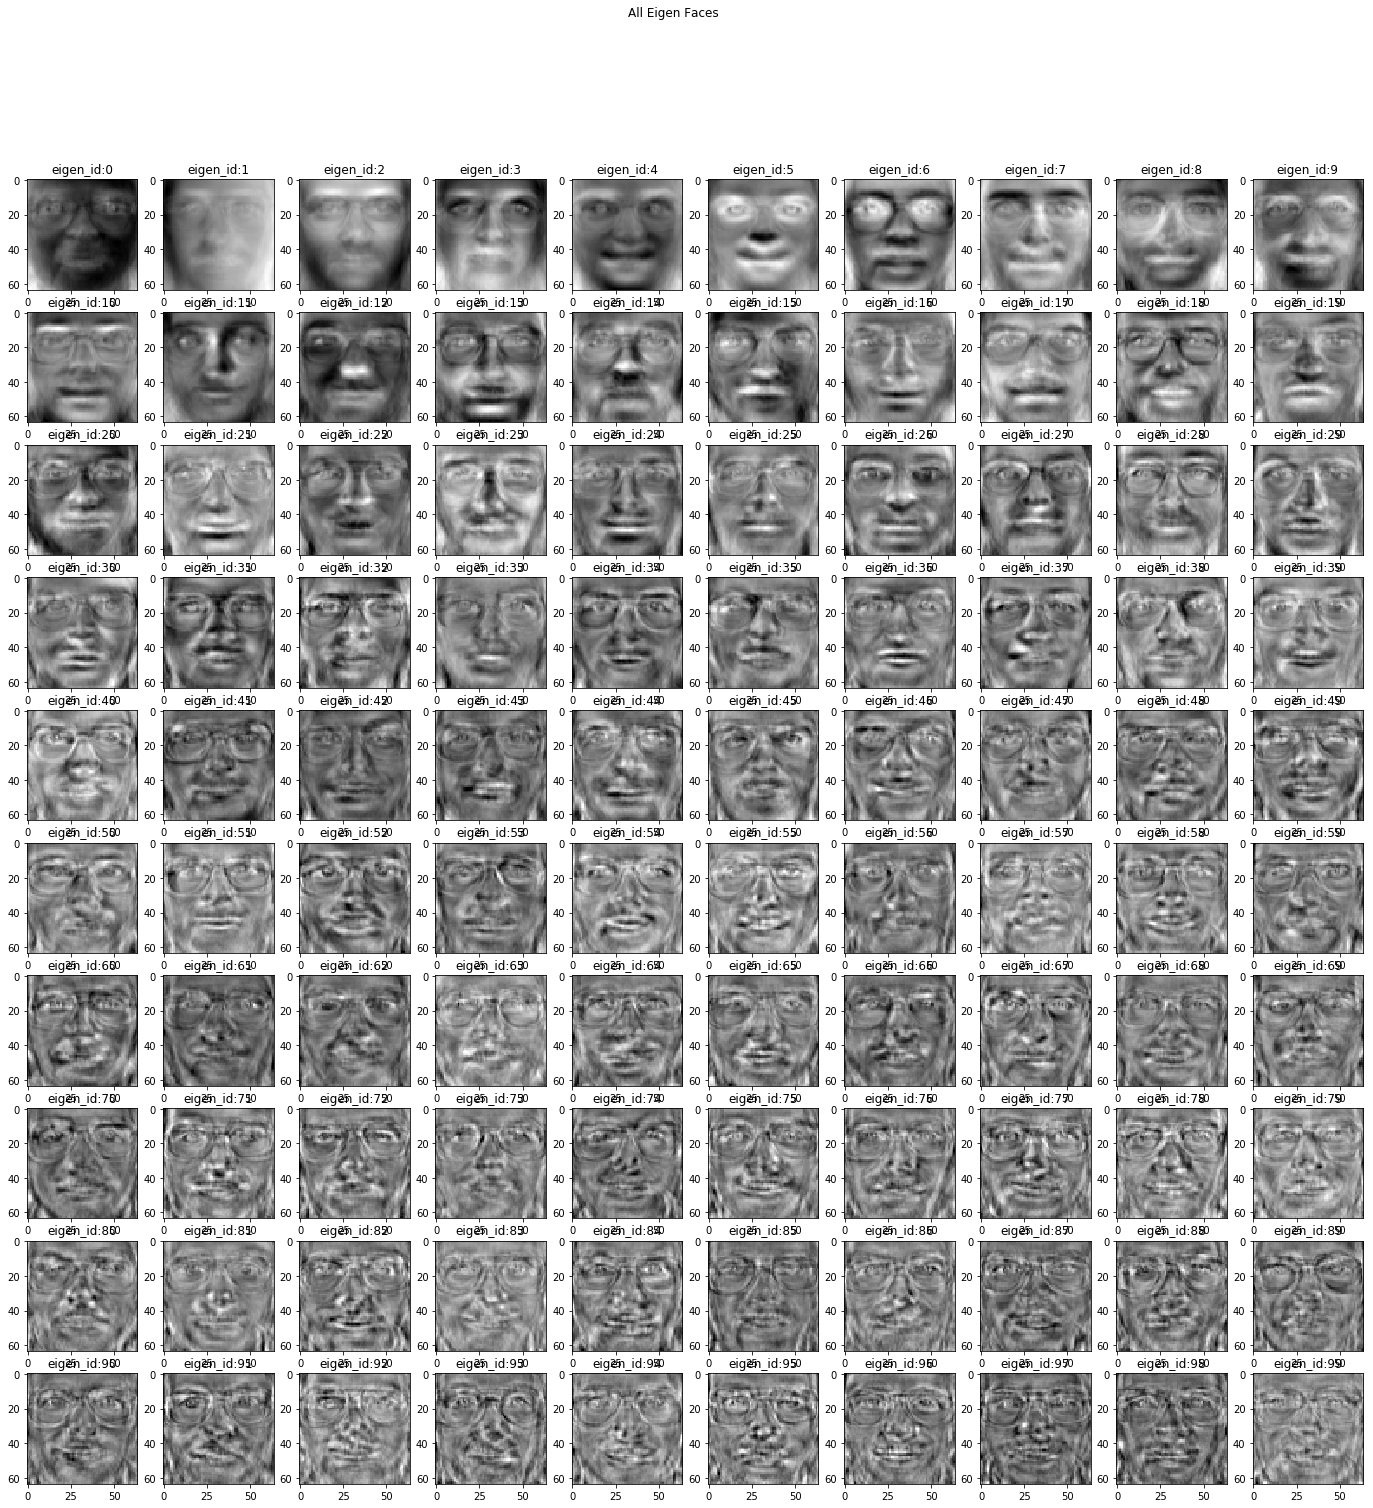

In [18]:




number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, pics.shape[1], pics.shape[2]))

columns=10
rows=int(number_of_eigenfaces/columns)
fig, axarr=plt.subplots(nrows=rows, ncols=columns, figsize=(24,24))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")

    axarr[i].set_title("eigen_id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [19]:
# Store accuracies of the machine learning methods for comparison at the end
list_names_pca = []
list_accuracy_pca = []

In [20]:


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_pca, y_train)

LR_accuracy = round(lr.score(X_test_pca, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names_pca.append("Logistic Regression")
list_accuracy_pca.append(LR_accuracy)
y_pred = lr.predict(X_test_pca)


from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR_accuracy is % 98.33
confusion matrix:
[[3 0 0 ... 0 0 0]
 [1 5 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]


In [21]:

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(X_train_pca, y_train)
RF_accuracy = round(rf.score(X_test_pca, y_test)*100,2)

y_pred = rf.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("RF_accuracy is %", RF_accuracy)

list_names_pca.append("Random Forest")
list_accuracy_pca.append(RF_accuracy)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]
RF_accuracy is % 91.67


In [22]:

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(X_train_pca, y_train)
Knn_accuracy = round(Knn.score(X_test_pca, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names_pca.append("KNN")
list_accuracy_pca.append(Knn_accuracy)

y_pred = Knn.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)


Knn_accuracy is % 90.83
confusion matrix:
[[1 0 0 ... 1 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train_pca, y_train)
svm_accuracy = round(svm.score(X_test_pca,y_test)*100,2)



y_pred = svm.predict(X_test_pca)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("SVM_accuracy is %",svm_accuracy)
list_names_pca.append("SVM")
list_accuracy_pca.append(svm_accuracy)

confusion matrix:
[[3 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 2]]
SVM_accuracy is % 96.67


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
nb_accuracy = round(nb.score(X_test_pca,y_test)*100,2)

# Predicting the Test set results
y_pred = nb.predict(X_test_pca)

# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

print("Naive_Bayes_accuracy is %",nb_accuracy)
list_names_pca.append("Naive_Bayes")
list_accuracy_pca.append(nb_accuracy)

confusion matrix:
[[2 0 0 ... 0 0 0]
 [2 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 2]]
Naive_Bayes_accuracy is % 78.33


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
df = pd.DataFrame({'METHOD': list_names_pca, 'ACCURACY (%)': list_accuracy_pca})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,Naive_Bayes,78.33
1,KNN,90.83
2,Random Forest,91.67
3,SVM,96.67
4,Logistic Regression,98.33
